# Assignment 5

This assignment has weighting $1.5$.

### Huang Kai     UID:3035086340

# Model tuning and evaluation

In [3]:
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

## Dataset

We will use the Wisconsin breast cancer dataset for the following questions

In [4]:
import pandas as pd

wdbc_source = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
#wdbc_source = '../datasets/wdbc/wdbc.data'

df = pd.read_csv(wdbc_source, header=None)

In [5]:
from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.transform(['M', 'B'])

array([1, 0], dtype=int64)

In [6]:
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.20, random_state=1)

In [7]:
%matplotlib inline

# K-fold validation (20 points)

Someone wrote the code below to conduct cross validation.
Do you see anything wrong with it?
And if so, correct the code and provide an explanation.

In [8]:
import numpy as np
import copy
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline

if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import StratifiedKFold
else:
    from sklearn.model_selection import StratifiedKFold

scl = StandardScaler()
pca = PCA(n_components=2)
clf = Perceptron(random_state=1)

# data preprocessing
X_train_std = scl.fit_transform(X_train)
X_test_std = scl.transform(X_test)

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# compute the data indices for each fold
if Version(sklearn_version) < '0.18':
    kfold = StratifiedKFold(y=y_train, 
                            n_folds=10,
                            random_state=1)
else:
    kfold = StratifiedKFold(n_splits=10,
                            random_state=1).split(X_train, y_train)

num_epochs = 2
scores = []

enumerate_kfold = list(enumerate(kfold))
for epoch in range(num_epochs):
    for k, (train, test) in enumerate_kfold:
        clf.partial_fit(X_train_std[train], y_train[train], classes=np.unique(y_train))
        score = clf.score(X_train_std[test], y_train[test])
        scores.append(score)
        print('Epoch: %s, Fold: %s, Class dist.: %s, Acc: %.3f' % (epoch,
                                                                   k, 
                                                                   np.bincount(y_train[train]),
                                                                   score))
    print('')
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Epoch: 0, Fold: 0, Class dist.: [256 153], Acc: 0.978
Epoch: 0, Fold: 1, Class dist.: [256 153], Acc: 0.978
Epoch: 0, Fold: 2, Class dist.: [256 153], Acc: 0.978
Epoch: 0, Fold: 3, Class dist.: [256 153], Acc: 0.935
Epoch: 0, Fold: 4, Class dist.: [256 153], Acc: 1.000
Epoch: 0, Fold: 5, Class dist.: [257 153], Acc: 1.000
Epoch: 0, Fold: 6, Class dist.: [257 153], Acc: 0.978
Epoch: 0, Fold: 7, Class dist.: [257 153], Acc: 0.978
Epoch: 0, Fold: 8, Class dist.: [257 153], Acc: 0.978
Epoch: 0, Fold: 9, Class dist.: [257 153], Acc: 0.978

Epoch: 1, Fold: 0, Class dist.: [256 153], Acc: 0.957
Epoch: 1, Fold: 1, Class dist.: [256 153], Acc: 1.000
Epoch: 1, Fold: 2, Class dist.: [256 153], Acc: 0.935
Epoch: 1, Fold: 3, Class dist.: [256 153], Acc: 0.978
Epoch: 1, Fold: 4, Class dist.: [256 153], Acc: 1.000
Epoch: 1, Fold: 5, Class dist.: [257 153], Acc: 1.000
Epoch: 1, Fold: 6, Class dist.: [257 153], Acc: 0.978
Epoch: 1, Fold: 7, Class dist.: [257 153], Acc: 0.978
Epoch: 1, Fold: 8, Class di

## Answer
There's something wrong in the code above.

In the loop `enmuerate_kfold`, we should use the `fit()` method instead of the `partial_fit()` method of the classifier.

The reason is that in K-fold cross validation, we need to make sure that iterations are independent to avoid cumulative learning. If we use `partial_fit()`, we can see that the two epochs don't give exactly the same result. But since in each epoch, we are doing the same thing, so we should expect the same result for different epochs.

After correcting the mistake mentioned above, the code and output will be as follows:

In [9]:
for epoch in range(num_epochs):
    for k, (train, test) in enumerate_kfold:
        clf.fit(X_train_std[train], y_train[train])
        score = clf.score(X_train_std[test], y_train[test])
        scores.append(score)
        print('Epoch: %s, Fold: %s, Class dist.: %s, Acc: %.3f' % (epoch,
                                                                   k, 
                                                                   np.bincount(y_train[train]),
                                                                   score))
    print('')
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Epoch: 0, Fold: 0, Class dist.: [256 153], Acc: 0.913
Epoch: 0, Fold: 1, Class dist.: [256 153], Acc: 0.978
Epoch: 0, Fold: 2, Class dist.: [256 153], Acc: 0.935
Epoch: 0, Fold: 3, Class dist.: [256 153], Acc: 0.935
Epoch: 0, Fold: 4, Class dist.: [256 153], Acc: 0.957
Epoch: 0, Fold: 5, Class dist.: [257 153], Acc: 1.000
Epoch: 0, Fold: 6, Class dist.: [257 153], Acc: 0.933
Epoch: 0, Fold: 7, Class dist.: [257 153], Acc: 0.978
Epoch: 0, Fold: 8, Class dist.: [257 153], Acc: 0.978
Epoch: 0, Fold: 9, Class dist.: [257 153], Acc: 0.978

Epoch: 1, Fold: 0, Class dist.: [256 153], Acc: 0.913
Epoch: 1, Fold: 1, Class dist.: [256 153], Acc: 0.978
Epoch: 1, Fold: 2, Class dist.: [256 153], Acc: 0.935
Epoch: 1, Fold: 3, Class dist.: [256 153], Acc: 0.935
Epoch: 1, Fold: 4, Class dist.: [256 153], Acc: 0.957
Epoch: 1, Fold: 5, Class dist.: [257 153], Acc: 1.000
Epoch: 1, Fold: 6, Class dist.: [257 153], Acc: 0.933
Epoch: 1, Fold: 7, Class dist.: [257 153], Acc: 0.978
Epoch: 1, Fold: 8, Class di

# Precision-recall curve (40 points)

We have plotted ROC (receiver operator characteristics) curve for the breast cancer dataset.

Plot the precision-recall curve for the same data set using the same experimental setup (same setup as the ROC curve in the textbook).
What similarities and differences you can find between ROC and precision-recall curves?

You can find more information about precision-recall curve online such as: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html

# Answer

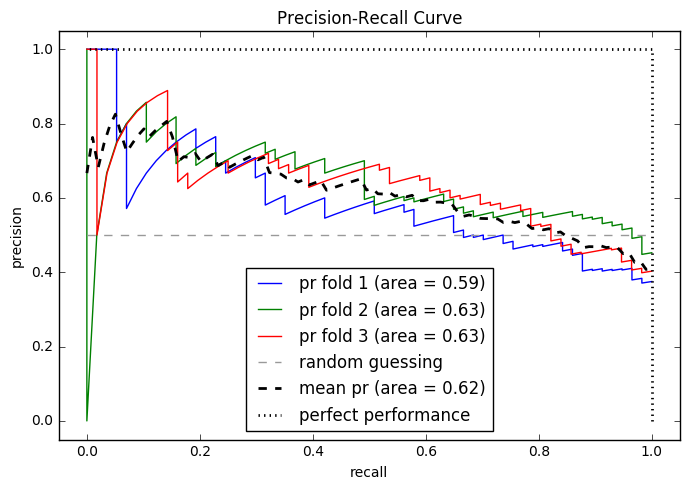

In [10]:
# your code
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import average_precision_score

from scipy import interp
import matplotlib.pyplot as plt

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(penalty='l2', 
                                               random_state=0, 
                                               C=100.0))])

# intentionally use only 2 features to make the task harder and the curves more interesting
X_train2 = X_train[:, [4, 14]]
X_test2 = X_test[:, [4, 14]]

if Version(sklearn_version) < '0.18':
    cv = StratifiedKFold(y_train, 
                         n_folds=3, 
                         random_state=1)
    
else:
    cv = list(StratifiedKFold(n_splits=3, 
                              random_state=1).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_precision = 0.0
mean_recall = np.linspace(0, 1, 100)

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])
    precision, recall, thresholds = precision_recall_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    #since precision and recall are both decreasing values, reverse them to be increasing arguments
    mean_precision += interp(mean_recall, recall[::-1], precision[::-1])
    pr_auc = auc(recall, precision)
    plt.plot(recall,
             precision,
             lw=1,
             label='pr fold %d (area = %0.2f)'
                   % (i+1, pr_auc))

plt.plot([0, 1],
         [0.5, 0.5],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')

mean_precision /= len(cv)
mean_auc = auc(mean_recall, mean_precision)
plt.plot(mean_recall, mean_precision, 'k--',
         label='mean pr (area = %0.2f)' % mean_auc, lw=2)
plt.plot([1, 1, 0],
         [0, 1, 1],
         lw=2,
         linestyle=':',
         color='black',
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower center")

plt.tight_layout()
plt.show()

your explanation

### Explanation
Similarities between ROC and precision-recall curves:

Both curves visualize cases for all thresholds. And for both curves, the larger the Area Under the Curve(AUC) is, the better the performance of the classifier. For random guessing, both have area 0.5 and for perfect performance, both have area 1.

Differences between ROC and precision-recall curves: 

With regard to precision-recall curves, the precision of random guessing has nothing to do with the threshold and thus the curve will be a horizontal line. Perfect performance will have 1 for both precision and recall. Moreover, for the ROC curves, true positive rate increases as false positive rate increases while for precision-recall curves, precision decreases as recall increases.

# Ensemble learning

We have used the following code to compute and plot the ensemble error from individual classifiers for binary classification:

In [95]:
from scipy.misc import comb
import math
import numpy as np

def ensemble_error(num_classifier, base_error):
    k_start = math.ceil(num_classifier/2)
    probs = [comb(num_classifier, k)*(base_error**k)*((1-base_error)**(num_classifier-k)) for k in range(k_start, num_classifier+1)]
    return sum(probs)

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
def plot_base_error(ensemble_error_func, num_classifier, error_delta):

    error_range = np.arange(0.0, 1+error_delta, error_delta)
    ensemble_errors = [ensemble_error_func(num_classifier=num_classifier, base_error=error) for error in error_range]

    plt.plot(error_range, ensemble_errors, 
             label = 'ensemble error',
             linewidth=2)
    plt.plot(error_range, error_range,
             label = 'base error',
             linestyle = '--',
             linewidth=2)
    plt.xlabel('base error')
    plt.ylabel('base/ensemble error')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

In [98]:
num_classifier = 11
error_delta = 0.01
base_error = 0.25

In [99]:

print(ensemble_error(num_classifier=num_classifier, base_error=base_error))


0.034327507019


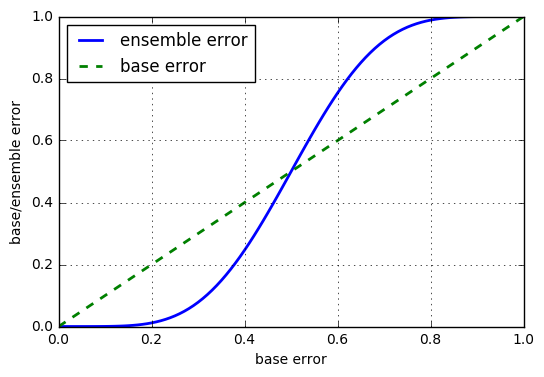

In [100]:
plot_base_error(ensemble_error, num_classifier=num_classifier, error_delta=error_delta)

# Number of classifiers (40 points)

The function plot_base_error() above plots the ensemble error as a function of the base error given a fixed number of classifiers.

Write another function to plot ensembe error versus different number of classifiers with a given base error.

Does the ensemble error always go down with more classifiers? 
Why or why not?

Can you improve the method ensemble_error() to produce a more reasonable plot?

## Answer

The code for plotting is below:

In [101]:
def plot_num_classifier(ensemble_error_func, max_num_classifier, base_error):
    # your code here
    classifier_num_range = np.arange(max_num_classifier)
    ensemble_errors = [ensemble_error_func(num_classifier=num_classifier, base_error=base_error) for num_classifier in classifier_num_range]

    plt.plot(classifier_num_range, ensemble_errors, 
             label = 'ensemble error',
             linewidth=2)
    plt.xlabel('number of classifiers')
    plt.ylabel('ensemble error')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

State your observations of the experiments of your code...

In [102]:
max_num_classifiers = 20
base_error = 0.25

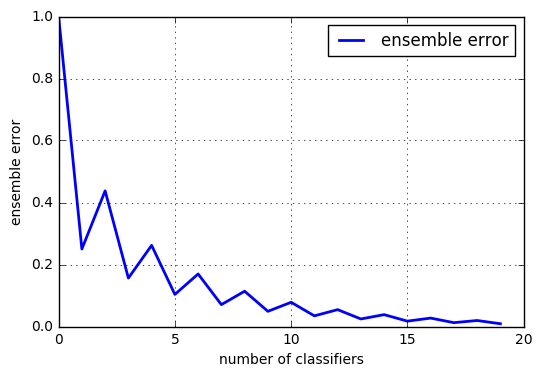

In [103]:
plot_num_classifier(ensemble_error, 
                    max_num_classifier=max_num_classifiers, 
                    base_error=base_error)

Explain your observations above.

Describe a better algorithm for computing the ensemble error.

### Observations
In general, ensemble error tends to go down when the number of classifiers gets large and will eventually converge to zero.

However, it is obvious to see fluctation in between. There will be an increase in ensemble error whenever the number of classifiers becomes even.

The reason is that we when sum up error probabilities, we start from `k_start = math.ceil(num_classifier/2)`. When we have even number of classifiers `N`, we start from exactly `N/2`, which means that when half of the classifiers perform correctly and the other half perform wrongly, it will be still treated as a misclassification. However, in this case, since the votes are half versus half, there is no majority vote. If we simply regard it as a misclassification, it will result in the increse of ensemble error when the number of classifiers is even. (When the number of classifiers is odd, there will definitely be a majority vote and such case won't appear because we start from `(N+1)/2`).

### Better Algorithm
To fix the problem described above, the easiest and most intuitive modification is for the case when half of the classifiers perform correctly and the other half perform wrongly, we further multiply its probability by 1/2 before adding to the overall ensember error. It makes sence because when there is a tie in the voting, there is 50 percent chance for a misclassification.

The modified algorithm for computing the ensemble error is as follows.

As shown in the new graph, after using this algorithm, the ensemble error will always decrease when the number of classifiers gets larger regardless of even or odd number of classifiers. Thus, the problem is fixed.

In [104]:
def better_ensemble_error(num_classifier, base_error):
    k_start = math.ceil(num_classifier/2)
    if(num_classifier%2!=0):
        probs = [comb(num_classifier, k)*(base_error**k)*((1-base_error)**(num_classifier-k)) for k in range(k_start, num_classifier+1)]
    else:
        probs = [comb(num_classifier, k)*(base_error**k)*((1-base_error)**(num_classifier-k)) for k in range(k_start+1, num_classifier+1)]
        probs.append(comb(num_classifier, k_start)*(base_error**k_start)*((1-base_error)**(num_classifier-k_start))*0.5)
    return sum(probs)

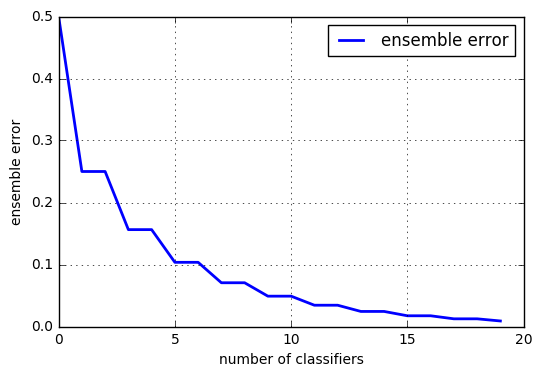

In [105]:
plot_num_classifier(better_ensemble_error, 
                    max_num_classifier=max_num_classifiers, 
                    base_error=base_error)